<a href="https://colab.research.google.com/github/Iuliia-Glaz/AI-Group-Project/blob/main/AI_group_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv('/content/alien_galaxy (1).csv')

# Drop irrelevant columns
data = data.drop(['Planet_ID'], axis=1)

# Handle missing values (if any)
# Iterate through columns and fill NaN values with the mean only for numeric columns
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
       data[column] = data[column].fillna(data[column].mean())
    else:
        # For non-numeric columns, you can fill with a suitable value like the mode or an empty string
        data[column] = data[column].fillna(data[column].mode()[0])  # Using mode for non-numeric columns

# Normalize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))


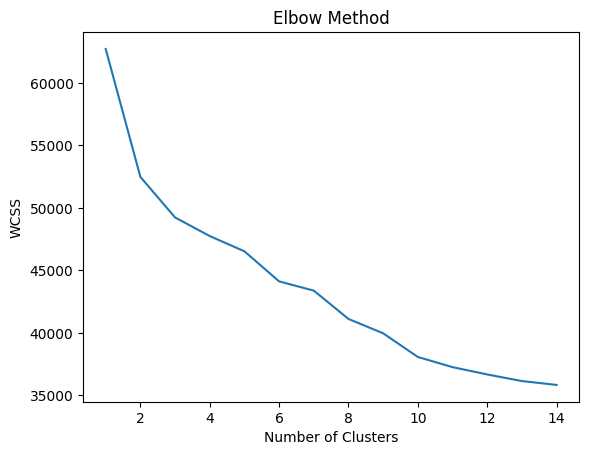

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal k
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with optimal clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)
